In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def get_Cycle_n_CDC(X):
    X["cycle_n"] = 0
    X["CDC"] = 'cdc'
    cycle = 1
    for i in range(len(X["Voltage"])):
        X.loc[0, "CDC"] = 'discharge' #PTCDI Cathode half cell begain with discharge
        X.loc[i, "cycle_n"] = cycle
        if (X.loc[i, "CDC"] == 'discharge') & (X.loc[i, "Voltage"] > 1.5):
            X.loc[i+1, "CDC"] = 'discharge'
        elif (X.loc[i, "CDC"] == 'discharge') & (X.loc[i, "Voltage"] < 1.5):
            X.loc[i+1, "CDC"] = 'charge'   
        elif (X.loc[i, "CDC"] == 'charge') & (X.loc[i, "Voltage"] < 3.5):
            X.loc[i+1, "CDC"] = 'charge'  
        elif (X.loc[i, "CDC"] == 'charge') & (X.loc[i, "Voltage"] > 3.5):
            X.loc[i+1, "CDC"] = 'discharge'
            cycle += 1
    X["cycle_n"] = X["cycle_n"].astype(pd.Int64Dtype())
    X.dropna(inplace = True)
    return X

In [35]:
def get_SepCap_per_cycle(X):
    X["SepCap_Cycle"] = 0.0
    n = 0
    for i in range(len(X["Voltage"])):
        if np.isclose(X.loc[i, "SepCap"], 0.0, atol = 0.0001):
            n = i
        elif i < len(X["Voltage"])-1:
            if X.loc[i+1, "SepCap"] < X.loc[i, "SepCap"]:
                X.loc[n:i, "SepCap_Cycle"] = X.loc[i, "SepCap"]
        elif (i == len(X["Voltage"])-1):
            X.loc[n:i, "SepCap_Cycle"] = X.loc[i, "SepCap"]
    return X

In [37]:
df_pgc = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PGC.csv")

df_pgc["active_M"]= 0.7
df_pgc["2D_G"]= 0.2
df_pgc["1D_C"]= 0.1
df_pgc["0D_S"]= 0.0
df_pgc["name"]= 'PGC'

get_Cycle_n_CDC(df_pgc)
get_SepCap_per_cycle(df_pgc)

df_pgc.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.1345,0.0,0.7,0.2,0.1,0.0,PGC,1,discharge,26.4
1,1.6871,16.7,0.7,0.2,0.1,0.0,PGC,1,discharge,26.4
2,1.4977,26.4,0.7,0.2,0.1,0.0,PGC,1,discharge,26.4
3,2.5834,0.0,0.7,0.2,0.1,0.0,PGC,1,charge,26.4
4,3.1303,16.9,0.7,0.2,0.1,0.0,PGC,1,charge,26.4
5,3.5032,26.4,0.7,0.2,0.1,0.0,PGC,1,charge,26.4
6,2.1320,0.0,0.7,0.2,0.1,0.0,PGC,2,discharge,26.4
7,1.6946,16.7,0.7,0.2,0.1,0.0,PGC,2,discharge,26.4
8,1.4968,26.4,0.7,0.2,0.1,0.0,PGC,2,discharge,26.4
9,2.5933,0.0,0.7,0.2,0.1,0.0,PGC,2,charge,26.4


In [38]:
df_pcg = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PCG.csv")

df_pcg["active_M"]= 0.7
df_pcg["2D_G"]= 0.1
df_pcg["1D_C"]= 0.2
df_pcg["0D_S"]= 0.0
df_pcg["name"]= 'PCG'

get_Cycle_n_CDC(df_pcg)
get_SepCap_per_cycle(df_pcg)

df_pcg.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.4712,0.0,0.7,0.1,0.2,0.0,PCG,1,discharge,45.9
1,2.1487,16.7,0.7,0.1,0.2,0.0,PCG,1,discharge,45.9
2,1.8967,33.4,0.7,0.1,0.2,0.0,PCG,1,discharge,45.9
3,1.4906,45.9,0.7,0.1,0.2,0.0,PCG,1,discharge,45.9
4,2.2864,0.0,0.7,0.1,0.2,0.0,PCG,1,charge,45.9
5,2.6724,16.7,0.7,0.1,0.2,0.0,PCG,1,charge,45.9
6,2.9030,33.4,0.7,0.1,0.2,0.0,PCG,1,charge,45.9
7,3.5122,45.9,0.7,0.1,0.2,0.0,PCG,1,charge,45.9
8,2.4637,0.0,0.7,0.1,0.2,0.0,PCG,2,discharge,45.3
9,2.1450,16.7,0.7,0.1,0.2,0.0,PCG,2,discharge,45.3


In [39]:
df_pcs = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PCS.csv")
df_pcs["active_M"]= 0.7
df_pcs["2D_G"]= 0.0
df_pcs["1D_C"]= 0.2
df_pcs["0D_S"]= 0.1
df_pcs["name"]= 'PCS'

get_Cycle_n_CDC(df_pcs)
get_SepCap_per_cycle(df_pcs)

df_pcs.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.7954,0.0,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
1,2.4842,16.7,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
2,2.3788,33.3,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
3,2.2495,50.0,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
4,2.1168,66.7,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
5,1.9692,83.4,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
6,1.7994,100.0,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
7,1.4633,111.7,0.7,0.0,0.2,0.1,PCS,1,discharge,111.7
8,1.7795,0.0,0.7,0.0,0.2,0.1,PCS,1,charge,112.3
9,2.1156,16.7,0.7,0.0,0.2,0.1,PCS,1,charge,112.3


In [40]:
df_psc = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PSC.csv")
df_psc["active_M"]= 0.7
df_psc["2D_G"]= 0.0
df_psc["1D_C"]= 0.1
df_psc["0D_S"]= 0.2
df_psc["name"]= 'PSC'

get_Cycle_n_CDC(df_psc)
get_SepCap_per_cycle(df_psc)

df_psc.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.8144,0.0,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
1,2.5016,16.7,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
2,2.3875,33.7,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
3,2.2718,50.6,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
4,2.1301,67.3,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
5,1.9813,84.0,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
6,1.8136,100.7,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
7,1.4896,111.0,0.7,0.0,0.1,0.2,PSC,1,discharge,111.0
8,1.8359,0.0,0.7,0.0,0.1,0.2,PSC,1,charge,111.2
9,2.1487,16.7,0.7,0.0,0.1,0.2,PSC,1,charge,111.2


In [42]:
df_pcgs = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PCGS.csv")
df_pcgs["active_M"]= 0.7
df_pcgs["2D_G"]= 0.1
df_pcgs["1D_C"]= 0.1
df_pcgs["0D_S"]= 0.1
df_pcgs["name"]= 'PCGS'

get_Cycle_n_CDC(df_pcgs)
get_SepCap_per_cycle(df_pcgs)

df_pcgs.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.6299,0.0,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
1,2.3428,17.0,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
2,2.2108,33.6,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
3,2.0774,50.3,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
4,1.9389,67.3,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
5,1.8093,83.9,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
6,1.4962,100.3,0.7,0.1,0.1,0.1,PCGS,1,discharge,100.3
7,1.9813,0.0,0.7,0.1,0.1,0.1,PCGS,1,charge,101.2
8,2.3217,17.0,0.7,0.1,0.1,0.1,PCGS,1,charge,101.2
9,2.5115,33.6,0.7,0.1,0.1,0.1,PCGS,1,charge,101.2


In [57]:
df_pscg5 = pd.read_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/PGCS7-0.5-1-1.5.csv")
df_pscg5["active_M"]= 0.7
df_pscg5["2D_G"]= 0.05
df_pscg5["1D_C"]= 0.1
df_pscg5["0D_S"]= 0.15
df_pscg5["name"]= 'PSCG5'

get_Cycle_n_CDC(df_pscg5)
get_SepCap_per_cycle(df_pscg5)

df_pscg5.head(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
0,2.6882,0.0,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
1,2.3791,16.7,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
2,2.2982,33.3,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
3,2.1556,50.0,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
4,1.9640,66.7,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
5,1.4109,83.6,0.7,0.05,0.1,0.15,PSCG5,1,discharge,84.5
6,1.1995,84.5,0.7,0.05,0.1,0.15,PSCG5,1,charge,84.5
7,2.0585,0.0,0.7,0.05,0.1,0.15,PSCG5,1,charge,84.7
8,2.4395,16.7,0.7,0.05,0.1,0.15,PSCG5,1,charge,84.7
9,2.5924,33.3,0.7,0.05,0.1,0.15,PSCG5,1,charge,84.7


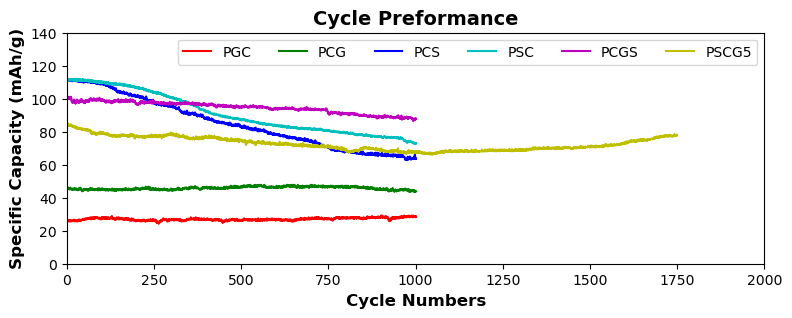

In [63]:
plt.figure(figsize=(9, 3))

plt.plot(df_pgc["cycle_n"], df_pgc["SepCap_Cycle"], color='r', label="PGC")
plt.plot(df_pcg["cycle_n"], df_pcg["SepCap_Cycle"], color='g', label="PCG")
plt.plot(df_pcs["cycle_n"], df_pcs["SepCap_Cycle"], color='b', label="PCS")
plt.plot(df_psc["cycle_n"], df_psc["SepCap_Cycle"], color='c', label="PSC")
plt.plot(df_pcgs["cycle_n"], df_pcgs["SepCap_Cycle"], color='m', label="PCGS")
plt.plot(df_pscg5["cycle_n"], df_pscg5["SepCap_Cycle"], color='y', label="PSCG5")
plt.axis([0, 2000, 0, 140])
plt.title("Cycle Preformance", fontsize=14, fontweight="bold")
plt.xlabel("Cycle Numbers", fontsize=12, fontweight="bold")
plt.ylabel("Specific Capacity (mAh/g)", fontsize=12, fontweight="bold")
plt.legend(ncol=6)
plt.show()

In [65]:
df_train_valid_test = pd.concat([df_pgc, df_pcg, df_pcs, df_psc, df_pcgs, df_pscg5], axis = 0, join = "outer").reset_index(drop=True)

In [67]:
df_train_valid_test.tail(10)

,Voltage,SepCap,active_M,2D_G,1D_C,0D_S,name,cycle_n,CDC,SepCap_Cycle
75669,2.2402,33.6,0.7,0.05,0.1,0.15,PSCG5,1749,discharge,77.8
75670,2.0902,50.6,0.7,0.05,0.1,0.15,PSCG5,1749,discharge,77.8
75671,1.8617,67.2,0.7,0.05,0.1,0.15,PSCG5,1749,discharge,77.8
75672,1.1917,77.8,0.7,0.05,0.1,0.15,PSCG5,1749,discharge,77.8
75673,2.1091,0.0,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1
75674,2.4950,16.7,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1
75675,2.6429,33.3,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1
75676,2.7778,50.0,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1
75677,2.9774,67.0,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1
75678,3.5057,78.1,0.7,0.05,0.1,0.15,PSCG5,1749,charge,78.1


In [69]:
df_train_valid_test.to_csv("/Users/taohuang/Library/CloudStorage/OneDrive-UTS/data backup/Data Cleaning/train_valid_test.csv", index=False)